# Electric Vehicle Charging Dataset

&nbsp;

#### INTERNATIONAL UNIVERSITY OF SARAJEVO

#### CS540 Data Analythical Problem Solving

#### Mirza Selimovic


&nbsp;
&nbsp;
&nbsp;
---


#### Problem statement

Optimize the placement and utilization of EV charging stations. Apply R for spatial analysis and demand forecasting to enhance infrastructure planning.

Link for the dataset : [Electric Vehicle Charging Dataset (kaggle.com) ](https://www.kaggle.com/datasets/michaelbryantds/electric-vehicle-charging-dataset)


This dataset contains information from 3,395 high resolution electric vehicle charging sessions. The data contains sessions from 85 EV drivers with repeat usage at 105 stations across 25 sites at a workplace charging program. The workplace locations include facilities such as research and innovation centers, manufacturing, testing facilities and office headquarters for a firm participating in the U.S. Department of Energy (DOE) workplace charging challenge. The data is in a human and machine readable *.CSV format. The resolution of the data is to the nearest second, which is the same resolution as used in the analysis of the paper. It is directly importable into free software.



## Import the packages

Import following packages:


*   dplyr
*   ggplot2
*   tidyverse: includes readr for zip file handling
*   data.table



In [76]:
# Load libraries
library(dplyr)
library(ggplot2)
library(tidyverse)  # Includes readr for zip file handling
library(data.table)



Load the data set from the zip file. Export  zip and load the CSV file.



In [77]:
# Set the path to your zip file (replace with your actual path)
zip_file_path <- "sample_data/ElectricVehicleChargingDataset.zip"

# Extract data from zip file (assuming a single CSV file inside)
temp_dir <- tempdir()  # Create a temporary directory
unzip(zip_file_path, exdir = temp_dir)  # Extract zip file contents

# Assuming the extracted file is named "data.csv" (modify if different)
data_path <- paste0(temp_dir, "/station_data_dataverse.csv")
data <- read_csv(data_path)  # Read the extracted data


Rows: 3395 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): weekday, platform
dbl  (20): sessionId, kwhTotal, dollars, startTime, endTime, chargeTimeHrs, ...
dttm  (2): created, ended

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


##Explore Data
Explore the data by listing first 5 rows, get number of rows and columns. Provide the column names.


In [78]:
data %>%
  slice_head(n = 5)

# Get number of columns
num_columns <- ncol(data)  # ncol for number of columns

# Get number of rows
num_rows <- nrow(data)  # nrow for number of rows

# Initialize an empty string to store the numbered list
numbered_list <- ""

column_names <- names(data)

# Loop through column names and add numbering
for (i in 1:length(column_names)) {
  numbered_list <- paste(numbered_list, i, ". ", column_names[i], sep = "")
  numbered_list <- paste(numbered_list, "\n", sep = "")  # Add newline for each item
}

# Print results
cat("Number of Columns:", num_columns, "\n")
cat("Number of Rows:", num_rows, "\n")
cat("List of Columns:\n",numbered_list)




sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,⋯,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1366563,7.78,0.00,14-11-18 15:40:26,14-11-18 17:11:04,15,17,1.5105556,Tue,android,⋯,0,3,0,1,0,0,0,0,0,0
3075723,9.74,0.00,14-11-19 17:40:26,14-11-19 19:51:04,17,19,2.1772222,Wed,android,⋯,0,3,0,0,1,0,0,0,0,0
4228788,6.76,0.58,14-11-21 12:05:46,14-11-21 16:46:04,12,16,4.6716667,Fri,android,⋯,0,3,0,0,0,0,1,0,0,0
3173284,6.17,0.00,14-12-03 19:16:12,14-12-03 21:02:18,19,21,1.7683333,Wed,android,⋯,0,3,0,0,1,0,0,0,0,0
3266500,0.93,0.00,14-12-11 20:56:11,14-12-11 21:14:06,20,21,0.2986111,Thu,android,⋯,0,3,0,0,0,1,0,0,0,0


Number of Columns: 24 
Number of Rows: 3395 
List of Columns:
 1. sessionId
2. kwhTotal
3. dollars
4. created
5. ended
6. startTime
7. endTime
8. chargeTimeHrs
9. weekday
10. platform
11. distance
12. userId
13. stationId
14. locationId
15. managerVehicle
16. facilityType
17. Mon
18. Tues
19. Wed
20. Thurs
21. Fri
22. Sat
23. Sun
24. reportedZip


Here is breakdown of the columns and its meanings:

* **sessionId**: Unique identifier for each charging session.
* **kwhTotal**: Total kilowatt-hours (kWh) of electricity delivered during the session.
* **dollars**: Total cost of the charging session.
* **created**: Date and time when the session was initiated (likely in a format suitable for conversion to a datetime object in R).
* **ended**: Date and time when the session was terminated.
* **startTime**: Time of day the session began (might be * * separate from the created timestamp if the date information exists elsewhere).
* **endTime**: Time of day the session ended (might be separate from the ended timestamp if the date information exists elsewhere).
* **chargeTimeHrs**: Total duration of the charging session in hours.
* **weekday**: Day of the week (Monday, Tuesday, etc.) the session occurred.
* **platform**: Platform used to initiate or manage the charging session (e.g., mobile operating system, charging station interface).
* **managerVehicle**: Flag indicating whether the session involved a fleet vehicle managed by a company or organization.
* **facilityType**: Type of facility where the charging station is located (e.g., public parking garage, private residence).
* **Mon - Sun**: Binary flags indicating the day of the week (1 for that day, 0 otherwise). This might be redundant with the weekday variable.
* **reportedZip**: Zip code where the charging session was reported (might differ from the actual location if anonymized).

## Clean & Describe Data

Filter the data so rows with following conditions are not included:


*   Distance that is NA
*   kwhTotal that is not zero (0)
*   chargeTimeHrs that is too small (limit 0.1 hr)




In [79]:
data <- subset(data, !is.na(distance) & kwhTotal != 0 & chargeTimeHrs > 0.1 )


Describe all columns' data values





In [80]:
# Function to analyze category details (modified for printing)
analyze_category <- function(column_name) {
  # Get number of unique values
  num_unique_values <- n_distinct(data[[column_name]])

  # Get all unique values
  unique_values <- unique(data[[column_name]])

  # Print results
  cat("Category:", column_name, "\n")
  cat("Number of Unique Values:", num_unique_values, "\n")

  # Check if there are any unique values to print
  if (length(unique_values) > 20) {
    cat("Unique Values: OMMITED DUE TO LARGE DATA AMOUNT\n")
  } else if (length(unique_values) > 0){
    cat("Unique Values:", unique_values, sep = ", ", collapse = "\n")
      }
  else {
    cat("No unique values found.\n")
  }

  cat("\n")
}


# Analyze each categorical column
categorical_columns <- c("weekday", "platform", "managerVehicle", 'sessionId',
                         "userId", "stationId", "locationId" ,
                         'kwhTotal', 'dollars', 'chargeTimeHrs', 'distance',
                         "facilityType", "Mon", "Tues", "Wed", "Thurs",
                         "Fri", "Sat", "Sun")  # Assuming these are categorical columns

for (col in categorical_columns) {
    analyze_category(col)

}

Category: weekday 
Number of Unique Values: 7 
Unique Values:, Tue, Wed, Thu, Fri, Mon, Sat, Sun, 

Category: platform 
Number of Unique Values: 2 
Unique Values:, ios, android, 

Category: managerVehicle 
Number of Unique Values: 2 
Unique Values:, 0, 1, 

Category: sessionId 
Number of Unique Values: 2325 
Unique Values: OMMITED DUE TO LARGE DATA AMOUNT

Category: userId 
Number of Unique Values: 63 
Unique Values:, 30828105, 97867440, 49241808, 33081741, 57882330, 19555569, 36768303, 72512154, 37392894, 48585042, 47158353, 45267948, 32751774, 76114467, 98345808, 81375624, 32015313, 92192265, 95980995, 82888443, 46009656, 92283246, 11299464, 33295482, 87444027, 50725917, 24920478, 30296079, 10909503, 85580550, 27476262, 68581656, 29309940, 25628328, 54832140, 24478344, 81701631, 50986683, 81880524, 74843010, 66233970, 41493375, 39279042, 29845530, 45460701, 81295434, 14260257, 10427670, 93202560, 24408549, 17969193, 13066218, 90546786, 41222907, 95411349, 75009330, 83573325, 39241917

# Descriptive Statistics

Calculate average charging time, cost per kWh, and session duration by weekdays/platforms.

Total Kwh and Charge Time

In [81]:
df_filtered <- data[data$kwhTotal == 0, ]

summary(df_filtered$chargeTimeMins)

# Calculate total energy in minutes
total_minutes <- sum(data$chargeTimeHrs * 60)

# Calculate total kWh consumed
total_kwh <- sum(data$kwhTotal)

# Print results
cat("Number of rows with kwhTotal = 0 is ", nrow(df_filtered), "\n")
cat("Total Energy Consumed (minutes):", total_minutes, "\n")
cat("Total kWh Consumed:", total_kwh)

Warning message:
“Unknown or uninitialised column: `chargeTimeMins`.”


Length  Class   Mode 
     0   NULL   NULL 

Number of rows with kwhTotal = 0 is  0 
Total Energy Consumed (minutes): 397435.2 
Total kWh Consumed: 13100.98

In [82]:
# Calculate average charging time (assuming chargeTimeHrs is numeric)
avg_charge_time <- mean(data$chargeTimeHrs)

# Calculate average cost per kWh (assuming kwhTotal and dollars are numeric)
avg_cost_kwh <- mean(data$dollars / data$kwhTotal)

# Group by weekday and calculate average session duration
avg_duration_weekday <- data %>%
  group_by(weekday) %>%
  summarize(avg_duration = mean(chargeTimeHrs))

# Group by platform and calculate average cost
avg_cost_platform <- data %>%
  group_by(platform) %>%
  summarize(avg_cost = mean(dollars))

# Print the results
cat("Average Charging Time:", avg_charge_time, "hours\n")
cat("Average Cost per kWh:", avg_cost_kwh, "\n")
print(avg_duration_weekday)
print(avg_cost_platform)

Average Charging Time: 2.848998 hours
Average Cost per kWh: 0.01991015 
# A tibble: 7 × 2
  weekday avg_duration
  <chr>          <dbl>
1 Fri             2.80
2 Mon             2.83
3 Sat             2.32
4 Sun             2.16
5 Thu             2.86
6 Tue             2.87
7 Wed             2.95
# A tibble: 2 × 2
  platform avg_cost
  <chr>       <dbl>
1 android    0.0732
2 ios        0.114 


**Demand Analysis:**

Identify peak hours or days for charging based on `kwhTotal` and session counts.*italicised text*

Warning message in geom_col(stat = "identity", aes(fill = total_kwh), color = "black"):
“Ignoring unknown parameters: `stat`”


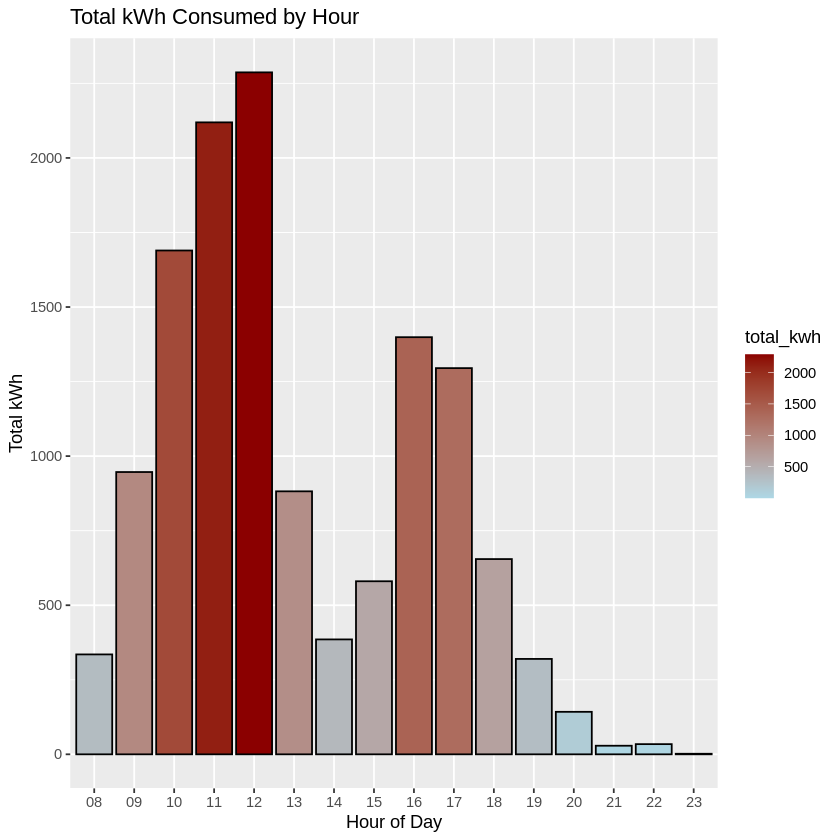

In [83]:
kwh_by_hour <- data %>%
  group_by(hour = strftime(created, format = "%H")) %>%  # Extract hour from created timestamp
  summarize(total_kwh = sum(kwhTotal))

# Create a time series plot
ggplot(kwh_by_hour, aes(x = hour, y = total_kwh)) +
  geom_col(stat = "identity", aes(fill = total_kwh), color = "black") +  # Color based on total_kwh
  scale_fill_gradient(low = "lightblue", high = "darkred") +  # Color gradient for kWh values
  labs(title = "Total kWh Consumed by Hour", x = "Hour of Day", y = "Total kWh")


# Weekly Utilization
Identify days of the week when charging is mostly utilized




Warning message in geom_col(stat = "identity"):
“Ignoring unknown parameters: `stat`”


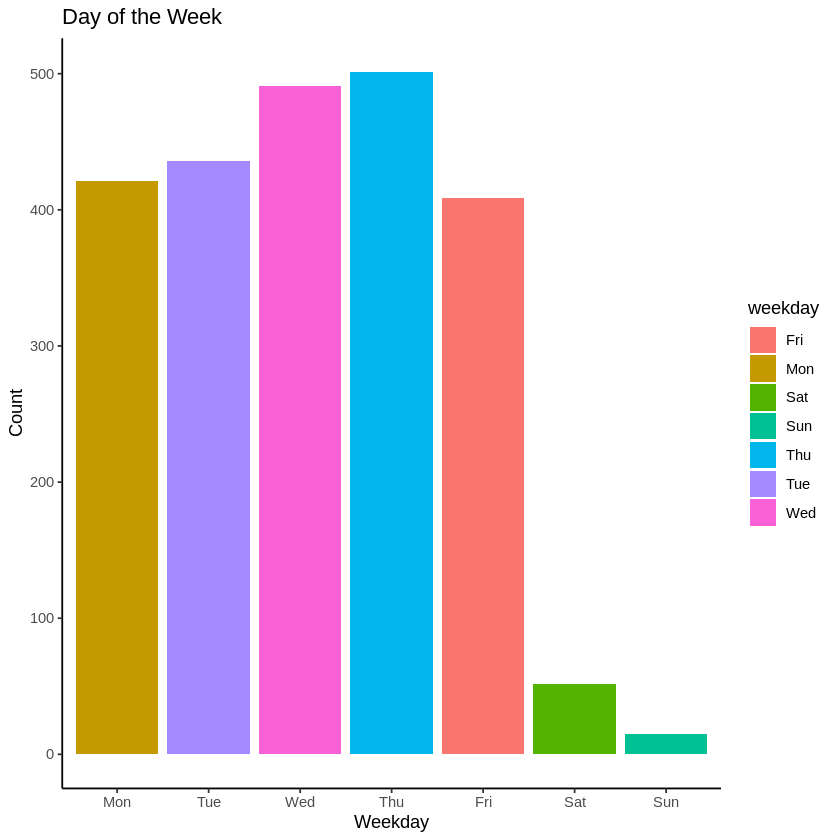

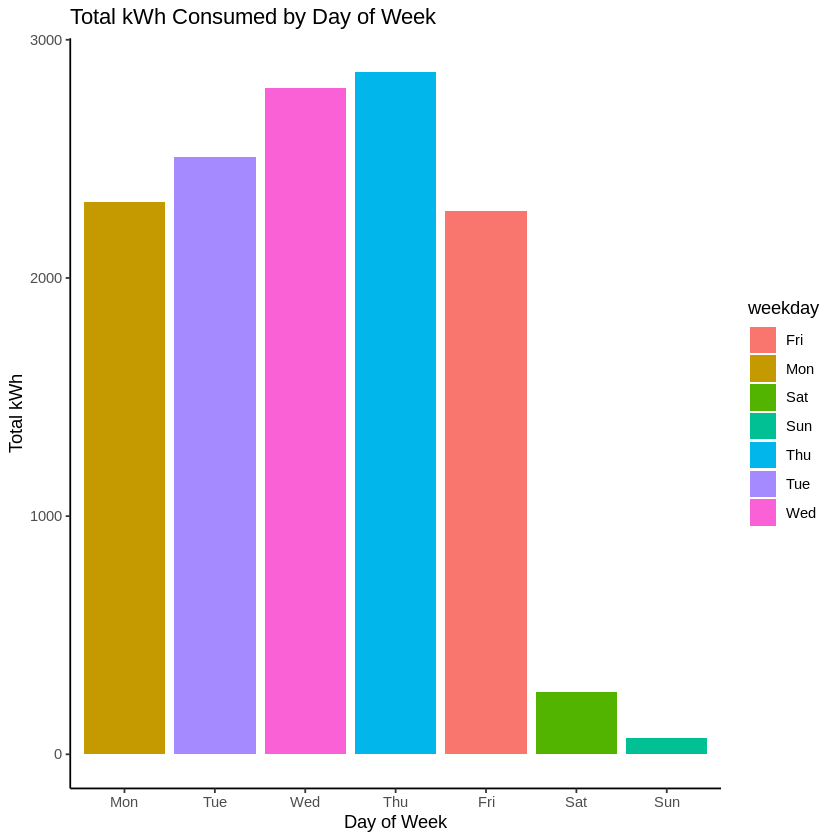

In [84]:
# 1. Utilization by Weekday and usage
ggplot(data, aes(x = weekday, fill=weekday)) +
  geom_bar(stat = "count") +  # Count occurrences for each weekday on x-axis
  labs(title = "Day of the Week", x = "Weekday", y = "Count") +  # Set labels
  scale_x_discrete(limits = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")) +  # Set order for weekdays
  theme_classic()  # Adjust the plot theme (optional)


# 2. Utilization by Weekday and sum kWhTotal
day_kwh_summary <- data %>%
  group_by(weekday) %>%  # Group by weekday (assuming numeric 1-7 or day names)
  summarize(total_kwh = sum(kwhTotal))

ggplot(day_kwh_summary, aes(x = weekday, y = total_kwh, fill = weekday)) +
  geom_col(stat = "identity") +
  labs(title = "Total kWh Consumed by Day of Week", x = "Day of Week", y = "Total kWh") +
  scale_x_discrete(limits = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")) +  # Set order for weekdays
  theme_classic()  # Adjust the plot theme (optional)

# Customer Behavior
Analyze charging behavior by platform type or facility type.

The platform that users used when charging

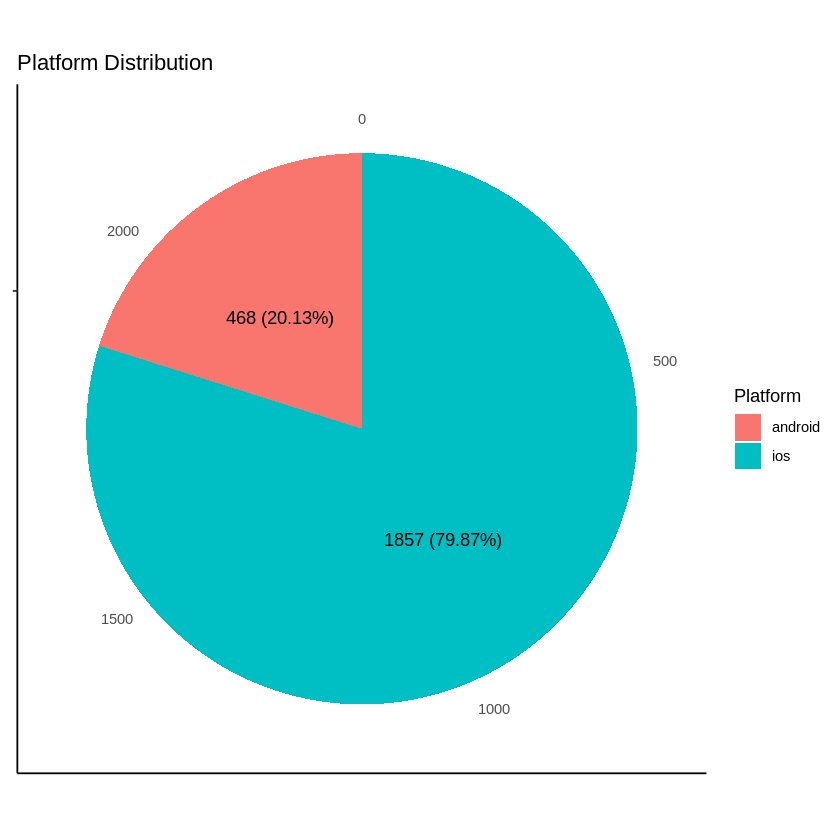

In [85]:
# Assuming 'data' is your dataframe and 'platform' is the column of interest
platform_data <- data %>%
  group_by(platform) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Create a pie chart with both count and percentage labels
ggplot(platform_data, aes(x = "", y = count, fill = platform)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste(count, " (", round(percentage, 2), "%)", sep = "")),
            position = position_stack(vjust = 0.5)) +
  labs(title = "Platform Distribution", x = NULL, y = NULL, fill = "Platform") +
  theme_classic()


Average Charging duration per platform user



In [86]:
average_session_duration <- data %>%
  group_by(platform) %>%
  summarise(average_duration = mean(chargeTimeHrs, na.rm = TRUE)) %>%
  arrange(desc(average_duration))

knitr::kable(average_session_duration, format = "markdown", col.names = c("Platform", "Average Session Duration (hrs)"))




|Platform | Average Session Duration (hrs)|
|:--------|------------------------------:|
|android  |                       2.867123|
|ios      |                       2.844430|

Average cost per platform

In [87]:
average_cost_per_platform <- data %>%
  group_by(platform) %>%
  summarise(average_cost = mean(dollars, na.rm = TRUE)) %>%
  arrange(desc(average_cost))

# Display the results in a nicely formatted table
knitr::kable(average_cost_per_platform, format = "markdown", col.names = c("Platform", "Average Cost (USD)"))




|Platform | Average Cost (USD)|
|:--------|------------------:|
|ios      |          0.1143834|
|android  |          0.0731624|

Facilitate Analysis



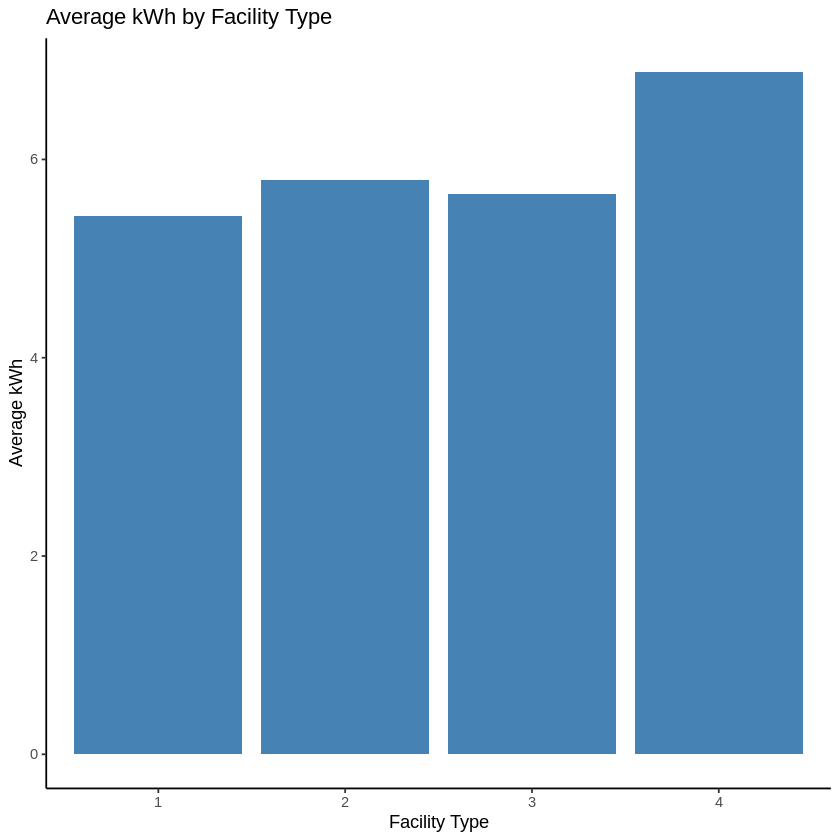

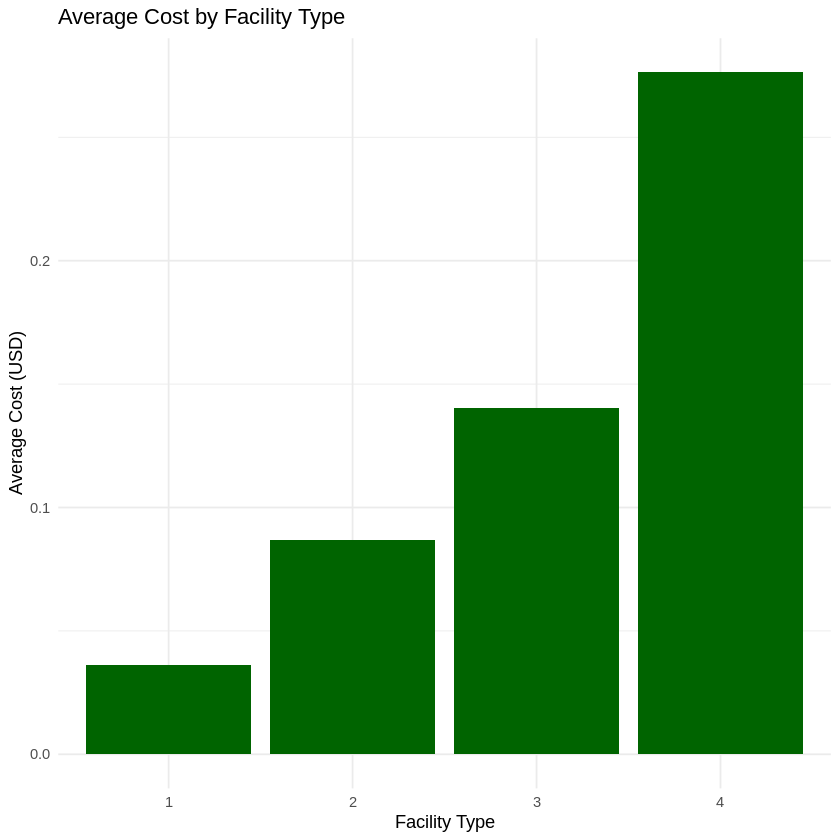

In [88]:
facility_usage <- data %>%
  group_by(facilityType) %>%
  summarise(
    total_sessions = n(),
    average_kwh = mean(kwhTotal, na.rm = TRUE),
    average_cost = mean(dollars, na.rm = TRUE)
  ) %>%
  ungroup()

# Now, let's visualize the average kWh and cost per facility type
ggplot(facility_usage, aes(x = reorder(facilityType, -average_kwh), y = average_kwh)) +
  geom_bar(stat = "identity", fill = 'steelblue') +
  labs(title = "Average kWh by Facility Type", x = "Facility Type", y = "Average kWh") +
  scale_x_discrete(limits = c("1", "2", "3", "4")) +
  theme_classic()  # Adjust th

ggplot(facility_usage, aes(x = reorder(facilityType, -average_cost), y = average_cost)) +
  geom_bar(stat = "identity", fill = 'darkgreen') +
  labs(title = "Average Cost by Facility Type", x = "Facility Type", y = "Average Cost (USD)") +
  scale_x_discrete(limits = c("1", "2", "3", "4")) +
  theme_minimal()

# Pricing Models

Explore relationships between charging duration, `kwhTotal`, and cost (`dollars`).


Call:
lm(formula = dollars ~ chargeTimeHrs + kwhTotal, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6959 -0.2192 -0.0170  0.1551  4.6261 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.543071   0.023218  -23.39   <2e-16 ***
chargeTimeHrs  0.324693   0.007220   44.97   <2e-16 ***
kwhTotal      -0.048962   0.003722  -13.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3574 on 2322 degrees of freedom
Multiple R-squared:  0.472,	Adjusted R-squared:  0.4716 
F-statistic:  1038 on 2 and 2322 DF,  p-value: < 2.2e-16


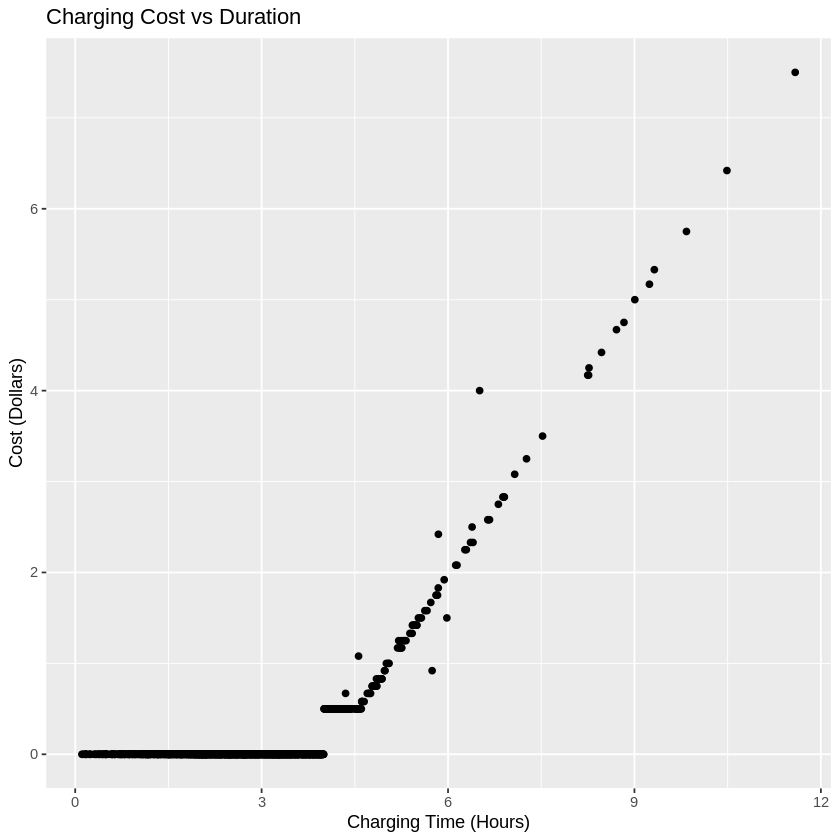

In [89]:
# Explore the relationship between charge duration, kWh, and cost
ggplot(data, aes(x = chargeTimeHrs, y = dollars)) +
  geom_point() +
  labs(title = "Charging Cost vs Duration", x = "Charging Time (Hours)", y = "Cost (Dollars)")

# Consider linear regression for pricing model exploration (caret package)
model <- lm(dollars ~ chargeTimeHrs + kwhTotal, data = data)
summary(model)  # Analyze model performance

# Predictive Model: Time Series Analysis

Since there is date and time information for each charging session, we can analyze the charging patterns over time. This involves:
* Trend analysis to identify long-term increases or decreases in usage.
* Seasonality analysis to understand daily or weekly patterns.
* Time series forecasting to predict future charging demand.

In [90]:
install.packages("forecast")
library(tidyverse)
library(lubridate)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



date,total_kwh
<date>,<dbl>
14-11-18,13.39
14-11-19,18.77
14-11-20,6.95
14-11-21,14.14
14-11-24,6.69



Call:
lm(formula = ts_data ~ time(ts_data))

Residuals:
     Min       1Q   Median       3Q      Max 
-160.402  -11.108    6.018   31.416  101.906 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -260.18      24.49  -10.62   <2e-16 ***
time(ts_data)   258.98      18.30   14.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.15 on 236 degrees of freedom
Multiple R-squared:  0.4589,	Adjusted R-squared:  0.4566 
F-statistic: 200.2 on 1 and 236 DF,  p-value: < 2.2e-16


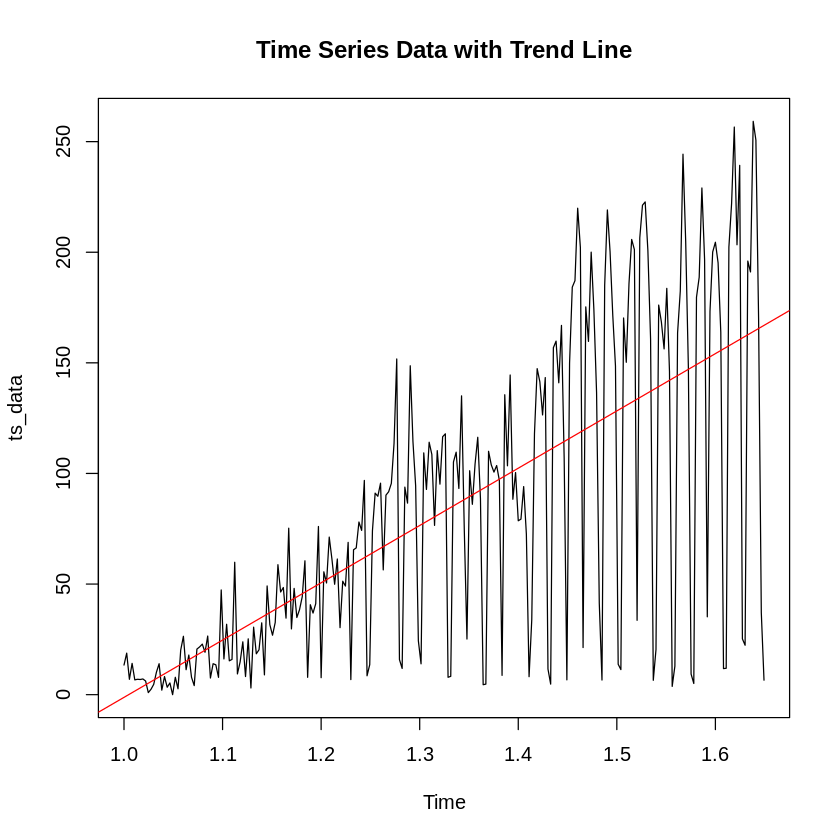

In [8]:
data$created <- as.POSIXct(data$created, format = "%Y-%m-%d %H:%M:%S")

# Aggregate data to get total kWh per day (or other desired time period)
daily_data <- data %>%
  group_by(date = as.Date(created)) %>%
  summarise(total_kwh = sum(kwhTotal))

daily_data %>%
  slice_head(n = 5)

# Convert to a time series object
ts_data <- ts(daily_data$total_kwh, frequency = 365)

# Fit a linear model to the time series data
trend_model <- lm(ts_data ~ time(ts_data))

# Summary of the model to see the trend
summary(trend_model)

# Plot the time series with the trend line
plot(ts_data, main = "Time Series Data with Trend Line")
abline(trend_model, col = "red")

# Charging Session Duration Prediction

Use ML models to predict the duration of EV charging sessions based on historical data. This can help users plan their charging schedules more effectively.


Install necessay packages for ML

In [30]:
#install necessary packages
install.packages("caret")
library(caret)

install.packages("keras")
library(keras)

install.packages("Metrics")

install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Split data to train and test. Split is 80% for train and 20% for test data.

In [65]:
features <- data[, c("startTime", "distance")]
target <- data$chargeTimeHrs  # Duration in hours

# Split data into training and validation sets
set.seed(42)
split_index <- createDataPartition(target, p = 0.8, list = FALSE)
X_train <- features[split_index, ]
X_val <- features[-split_index, ]
y_train <- target[split_index]
y_val <- target[-split_index]

# K-Nearest Neighbors (KNN)

*   KNN is a simple yet effective algorithm for regression tasks.
*   It predicts the duration based on the average of the K nearest neighbors in
the feature space.
*   You can use features like `chargeTimeHrs`, `startTime`, and `distance` to train the KNN model.
*    Tune the hyperparameter K to find the optimal value.
*    Evaluate the model using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

In [66]:

knn_grid <- expand.grid(k = 1:8)  # Define a grid of K values to explore

# Initialize KNN regressor
#knn_model <- train(y_train ~ ., data = X_train, method = "knn", trControl = trainControl(method = "cv"))
knn_model <- train(
  x = X_train,
  y = y_train,
  method = "knn",
  trControl = trainControl(method = "cv", number = 20),  # 5-fold cross-validation
  tuneGrid = knn_grid  # Specify the grid of K values
)
# Make predictions
y_pred_knn <- predict(knn_model, newdata = X_val)

# Get the best K value
best_k <- knn_model$bestTune$k
print(paste("Best K value:", best_k))

# Evaluate performance
library(Metrics)
mae_knn <- mae(y_val, y_pred_knn)
print(paste("KNN MAE:", round(mae_knn, 2), "minutes"))

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a

[1] "Best K value: 8"
[1] "KNN MAE: 0.68 minutes"


# Decision Trees (DT)
*   DTs are versatile and interpretable models.
*   They split the data based on features to create a tree-like structure.
*   Features like `startTime`, `weekday`, and `distance` can be useful.
*   Prune the tree to avoid overfitting.
*   Evaluate the DT model using metrics like MAE or R-squared.

In [59]:

# Load necessary libraries
library(randomForest)

# Initialize Decision Tree regressor
rf_model <- randomForest(target ~ ., data = features, ntree = 500)
# Make predictions
# Get feature importance
# Make predictions on the validation set (you'll need a validation set for this)
y_pred_dt <- predict(rf_model, newdata = X_val)

# Evaluate performance (calculate Mean Absolute Error)
mae_dt <- mae(y_val, y_pred_dt)
print(paste("Decision Tree MAE:", round(mae_dt, 2), "minutes"))



[1] "Decision Tree MAE: 0.6 minutes"


# Support Vector Machines (SVM)
* SVM is a powerful algorithm for both classification and regression tasks.
* It handles high-dimensional spaces and can capture non-linear patterns.

Here’s a basic example of training an SVM regression model:

In [60]:

# Load necessary libraries
library(e1071)


# Initialize Decision Tree regressor
model <- svm(target ~ ., data = features, kernel = "radial")

# Make predictions on the validation set (you'll need a validation set for this)
y_pred_dt <- predict(model, newdata = X_val)

# Evaluate performance (calculate Mean Absolute Error)
mae_dt <- mae(y_val, y_pred_dt)
print(paste("SVM MAE:", round(mae_dt, 2), "minutes"))



[1] "SVM MAE: 0.7 minutes"


# Neural Networks (Package: keras)
*   Neural networks can capture complex patterns in data.
*   Install the keras package: install.packages("keras").

Here’s a basic example of a feedforward neural network:

In [61]:
library(keras)

# Create a simple neural network
model <- keras_model_sequential() %>%
  layer_dense(units = 64, activation = "relu", input_shape = 2) %>%
  layer_dense(units = 1)  # Regression task

# Compile the model
model %>% compile(
  optimizer = "adam",
  loss = "mean_squared_error",
  metrics = c("mae")
)

# Train the model
model %>% fit(as.matrix(X_train), as.vector(y_train), epochs = 55, batch_size = 32)


# Make predictions on the validation set
y_pred_dt <- predict(model, x = as.matrix(X_val))

# Evaluate performance (calculate Mean Absolute Error)
mae_dt <- mae(as.vector(y_val), y_pred_dt)
print(paste("SVM MAE:", round(mae_dt, 2), "minutes"))

[1] "SVM MAE: 0.8 minutes"
